In [1]:
# import some libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [10, 10]

In [2]:
os.chdir(os.path.dirname(os.getcwd()))
os.chdir(os.path.dirname(os.getcwd()))
os.chdir('Data')

In [3]:
# read in data
df = pd.read_csv('od_deaths_merged.csv')

In [5]:
df.columns

Index(['Unnamed: 0', 'Year', 'State', 'State Abv', 'State Code', 'County',
       'County Code', 'Deaths', 'Population', 'Crude Rate', 'Cruder Rate',
       'Deathrate per 100', 'Unemployment_rate', 'Dispense_rate', 'SUMLEV',
       'AGEGRP', 'TOT_POP', 'TOT_MALE', 'TOT_FEMALE', 'WA_MALE', 'WA_FEMALE',
       'BA_MALE', 'BA_FEMALE', 'IA_MALE', 'IA_FEMALE', 'AA_MALE', 'AA_FEMALE',
       'NA_MALE', 'NA_FEMALE', 'TOM_MALE', 'TOM_FEMALE', 'NH_MALE',
       'NH_FEMALE', 'H_MALE', 'H_FEMALE'],
      dtype='object')

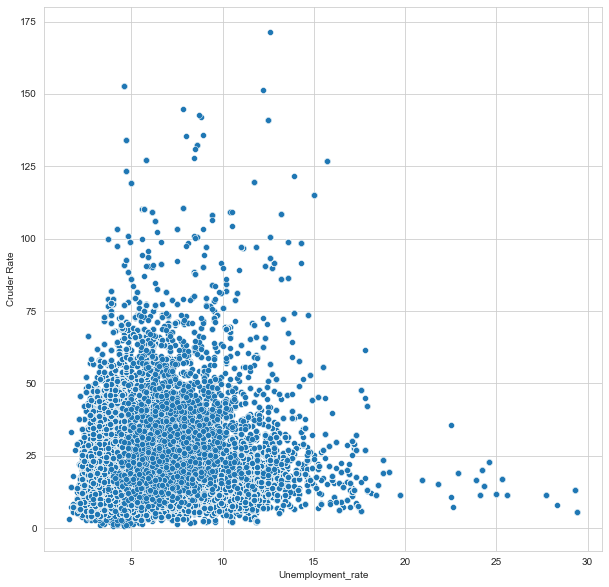

In [9]:
sns.scatterplot(data = df, x = 'Unemployment_rate', y = 'Cruder Rate')
plt.show()

<AxesSubplot:xlabel='Unemployment_rate', ylabel='Cruder Rate'>

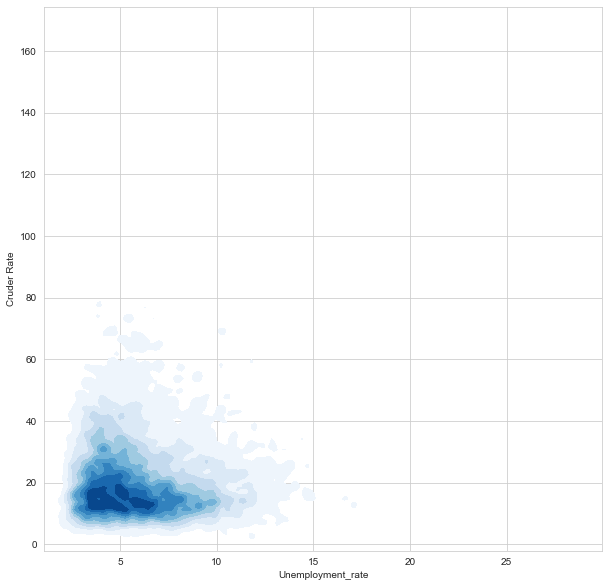

In [27]:
sns.kdeplot(data = df, x = 'Unemployment_rate', y = 'Cruder Rate', cmap = "Blues", shade = True, bw_adjust = .5)

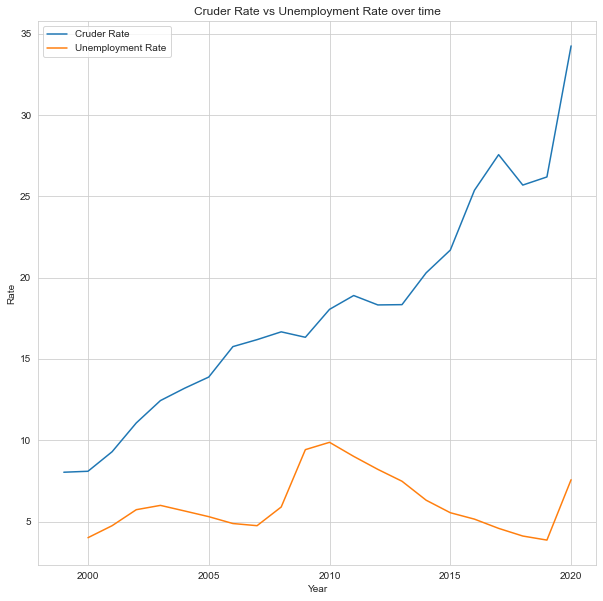

In [26]:
avg_cruder_rate = df.groupby('Year', as_index = False)['Cruder Rate'].mean()
avg_unemploy_rate = df.groupby('Year', as_index = False)['Unemployment_rate'].mean()

sns.lineplot(data = avg_cruder_rate, x = 'Year', y = 'Cruder Rate')
sns.lineplot(data = avg_unemploy_rate, x = 'Year', y = 'Unemployment_rate')
plt.legend(labels = ["Cruder Rate", "Unemployment Rate"])
plt.ylabel('Rate')
plt.title('Cruder Rate vs Unemployment Rate over time')
plt.show()

<AxesSubplot:xlabel='Unemployment_rate', ylabel='State'>

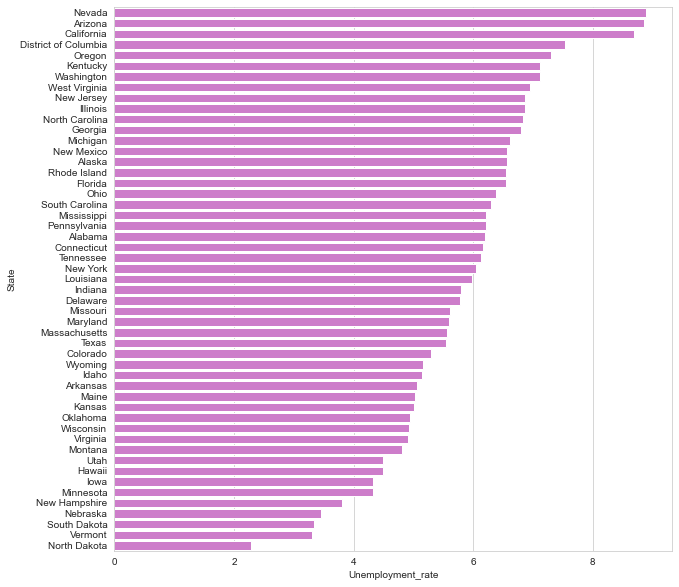

In [34]:
avg_st_cr = df.groupby('State', as_index = False)['Cruder Rate'].mean()
avg_st_ur = df.groupby('State', as_index = False)['Unemployment_rate'].mean()
sns.barplot(data = avg_st_ur, x = 'Unemployment_rate', y = 'State', orient = 'h', color = 'orchid',\
           order = avg_st_ur.sort_values('Unemployment_rate', ascending = False).State)

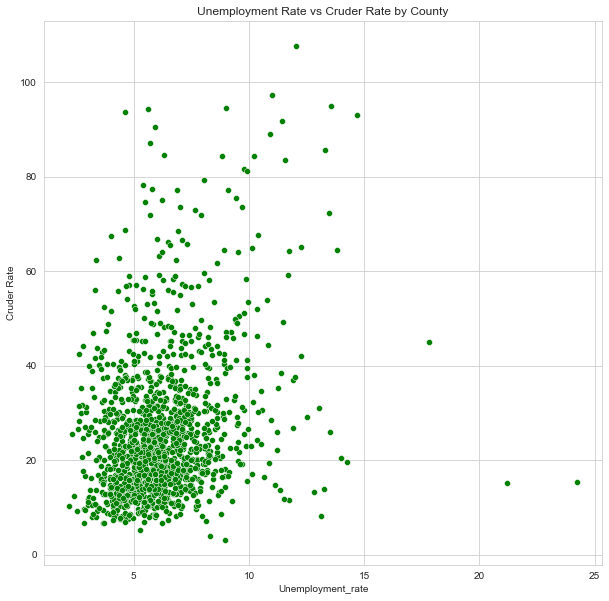

In [40]:
county_cr_ur = df.groupby('County', as_index = False)[['Cruder Rate', 'Unemployment_rate', 'Population']].mean()
sns.scatterplot(data = county_cr_ur, x = 'Unemployment_rate', y = 'Cruder Rate', color = 'Green')
plt.title('Unemployment Rate vs Cruder Rate by County')
plt.show()

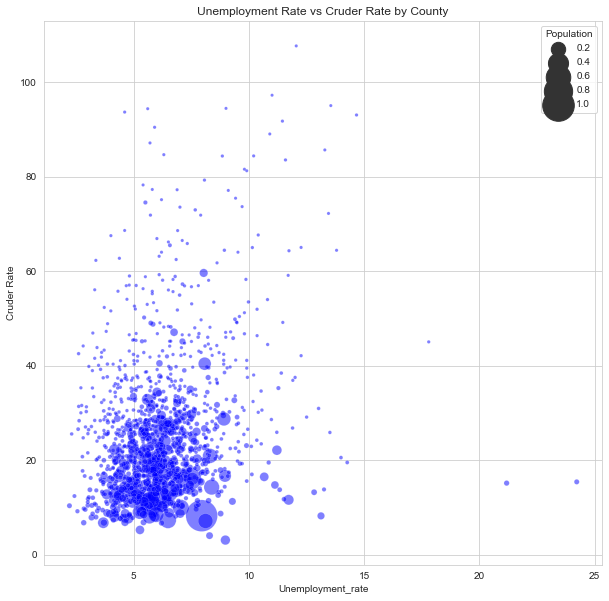

In [53]:
sns.scatterplot(data = county_cr_ur, x = 'Unemployment_rate', y = 'Cruder Rate', color = 'blue', size = 'Population', 
                sizes = (10,1000), alpha = 0.5)
plt.title('Unemployment Rate vs Cruder Rate by County')
plt.show()